In [23]:
%matplotlib inline

import toolparser as toolparser
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [86]:
df = toolparser.load_data_from_csv('../../../testing/data/survey.csv')
#questions = toolparser.extract_features(df)

In [18]:
data = toolparser.get_column_by_name(df, 'Geschlecht')
np.unique(data)

array(['Männlich', 'Sonstiges', 'Weiblich'], dtype=object)

In [87]:
df = pd.DataFrame(df['Geschlecht'])
#df_cat = df.astype('category')
#df_cat.dtypes
df

,Geschlecht
0,Weiblich
1,Weiblich
2,Männlich
3,Weiblich
4,Männlich
...,...
913,Weiblich
914,Männlich
915,Weiblich
916,Weiblich


In [70]:
df_cat.value_counts()

Geschlecht
Weiblich      495
Männlich      417
Sonstiges       6
Name: count, dtype: int64

In [89]:
categories = df['Geschlecht'].unique()

<Axes: ylabel='count'>

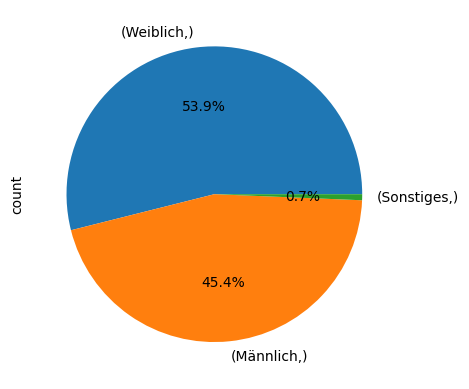

In [84]:
df.value_counts().plot.pie(y=categories, autopct='%1.1f%%')

In [98]:
import seaborn as sns
gender_count = pd.DataFrame(df.value_counts())
gender_count

,count
Geschlecht,
Weiblich,495
Männlich,417
Sonstiges,6


<Axes: xlabel='count', ylabel='Geschlecht'>

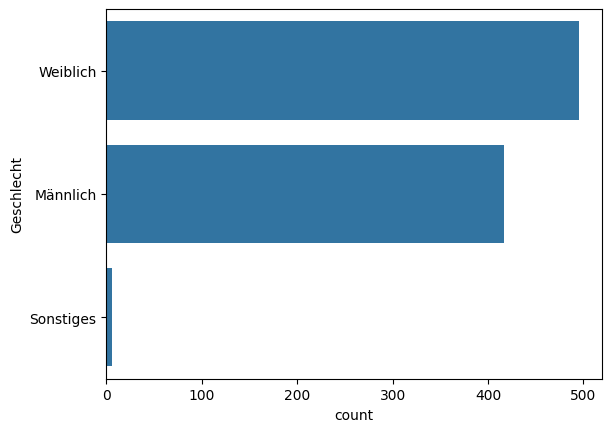

In [100]:
sns.barplot(gender_count, y='Geschlecht', x='count')

In [49]:
category = df['Geschlecht'].unique()
df = pd.Categorical(df['Geschlecht'], categories=category)
s = pd.Series(df)
s

0      Weiblich
1      Weiblich
2      Männlich
3      Weiblich
4      Männlich
         ...   
913    Weiblich
914    Männlich
915    Weiblich
916    Weiblich
917    Männlich
Length: 918, dtype: category
Categories (3, object): ['Weiblich', 'Männlich', 'Sonstiges']

In [4]:
len(questions)

60

In [3]:
answers = toolparser.extract_possible_answers(df)

In [4]:
answers0 = toolparser.count_responses_for_unique_answers(df, question=questions[0])
answers0

,Count
Geschlecht,
Männlich,417
Sonstiges,6
Weiblich,495


<Axes: ylabel='Geschlecht'>

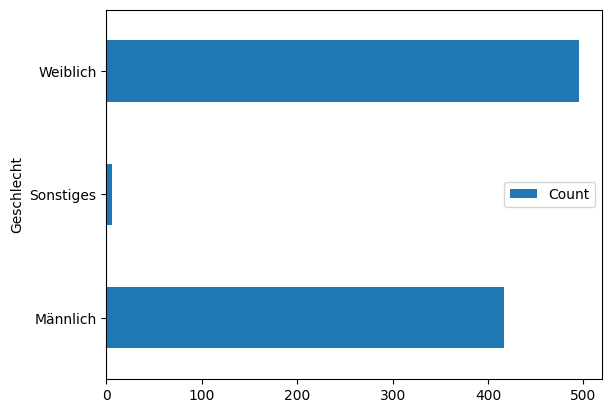

In [6]:
answers0.plot(kind='barh')

##### The following functionalities should be possible:
Add absolute numbers of percentages for each category<br>
Add a title<br>
Add a legend (default location of optional?)<br>
Choose colors<br>

<Axes: ylabel='Count'>

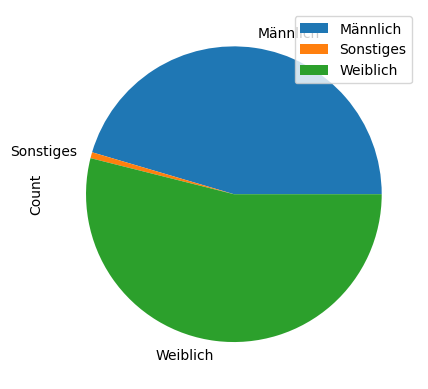

In [10]:
answers0.plot(kind='pie', y='Count', legend='Geschlecht')

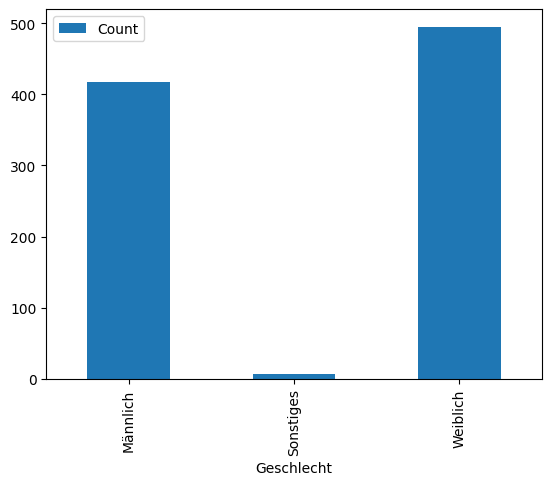

In [7]:
from visualization.chartparameter import ChartParams
from visualization.chartcreation import *

bar = ChartParams(kind='bar')
create_chart(answers0, bar)

In [5]:
df.describe()

,Bitte schätzen Sie Ihr ideologisches Weltbild ein.,Bitte schätzen Sie Ihre Wertevorstellung ein.,Sehen Sie Ihre politischen Anliegen in der aktuellen Regierung Ihres Landes (in dem Sie wählen dürfen) vertreten?,Impfstoff: AstraZeneca,Impfstoff: BioNTech/Pfizer,Impfstoff: Moderna,Impfstoff: Sputnik V,Impfstoff: Johnson & Johnson,Impfstoff: Curevac,Impfstoff: Sinopharm,Hat sich Ihr Alkoholkonsum seit Beginn der COVID-19-Pandemie verändert?
count,918.000000,918.000000,589.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,692.000000
mean,2.741830,2.993464,2.796265,3.142702,4.081699,3.751634,2.843137,3.360566,2.734205,2.630719,3.309249
std,0.747087,0.765933,0.794916,1.307768,1.126111,1.182097,1.225596,1.186829,1.229032,1.191488,0.944035
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,3.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000
max,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [3]:
from analysis.survey_description import SurveyDescription

survey1 = SurveyDescription(df)
responses = survey1.count_responses()
print(responses)
print(survey1.number_of_questions())

918
60


In [4]:
survey1.surveycompletion_counts([95,90,80,75,50])

,Completion_%,Count
0,95,14
1,90,59
2,80,82
3,75,32
4,50,0


In [9]:
# Testing = calculate completion pct per row
num_cols = df.shape[1]
df2 = df.copy()
df2['completion'] = (df.notnull().sum(axis=1) / num_cols) * 100
grouped = df2.groupby(['completion'])
count_ = grouped['completion'].count()
count_

completion
65.000000      1
66.666667      2
68.333333      8
70.000000     14
71.666667     15
73.333333     18
75.000000     32
76.666667     43
78.333333     62
80.000000     82
81.666667     75
83.333333    104
85.000000     89
86.666667     96
88.333333     92
90.000000     59
91.666667     66
93.333333     46
95.000000     14
Name: completion, dtype: int64